# Complexity Measures

Words, words, words.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import hjorth_params
from antropy import higuchi_fd, petrosian_fd, katz_fd

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_sims
from apm.plts import plot_lines
from apm.plts.settings import AP_COL, COMB_COL
from apm.sim.settings import SIM_PARAMS_AP, SIM_PARAMS_COMB, EXPS, FREQS, POWS, N_SIMS, EXP
from apm.sim.examples import SIG_AP, SIG_KN, SIG_OSC, SIG_COMB

## Functions

In [3]:
# Note: to be added to neurodsp
def convert_exp_fd(exp):
    """Convert exponent to expected Higuchi fractal dimension value.
    
    Parameters
    ----------
    exp : float
        Exponent value. 
    
    Returns
    -------
    float
        Predicted Higuchi fractal dimension value.
    
    Notes
    -----
    This works for exponents between {1, 3} (inclusive).
    As a special case, if exp is 0, D is 2. 
        if exp is 3, D is 1
        
    References
    ----------
    From F Cervantes-De la Torre et al, 2013
    """
    
    if exp == 0:
        out = 2
    elif exp >= 1 and exp <= 3:
        out = (5 - exp) / 2
    else:
        msg = 'Conversion not supported for given exponent value. '
        raise ValueError(msg)
    
    return out

## Settings

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Notebooks
SAVE_FIG = False

## Complexity

Words, words, words

In [6]:
def hjorth_mobility_wrapper(sig):
    """Wrapper function for computing and getting Hjorth mobility."""
    return hjorth_params(sig)[0]

def hjorth_complexity_wrapper(sig):
    """Wrapper function for computing and getting Hjorth complexity."""
    return hjorth_params(sig)[1]

## Hjorth Parameters on Examples Signals

#### Powerlaw Signal

In [7]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth mobility:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_mobility_wrapper(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_mobility_wrapper(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_mobility_wrapper(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_mobility_wrapper(SIG_KN)))

Computed Hjorth mobility:
  powerlaw: 	 0.0190
  osc:      	 0.0628
  combined: 	 0.0326
  knee:     	 0.4479


In [8]:
# Check the calculated Hjorth mobility values across some example signals
print('Computed Hjorth complexity:')
print('  powerlaw: \t {:1.4f}'.format(hjorth_complexity_wrapper(SIG_AP)))
print('  osc:      \t {:6.4f}'.format(hjorth_complexity_wrapper(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(hjorth_complexity_wrapper(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(hjorth_complexity_wrapper(SIG_KN)))

Computed Hjorth complexity:
  powerlaw: 	 67.9348
  osc:      	 1.0001
  combined: 	 20.2331
  knee:     	 3.2342


### Hjorth Parameters: Aperiodic Variations

In [9]:
# Run a set of simulations, calculating Hjorth measures across exponents
hjm_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, hjorth_mobility_wrapper, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

hjc_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, hjorth_complexity_wrapper, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

In [10]:
# Run a set of simulations, calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_mobility_wrapper, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

hjc_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_complexity_wrapper, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

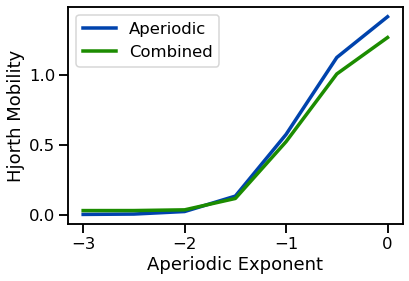

In [11]:
# Plot Hjorth mobility across exponents
plot_lines(EXPS, hjm_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, hjm_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hjorth Mobility')
plot_lines(save_fig=SAVE_FIG, file_name='hjm_both', file_path='complexity')

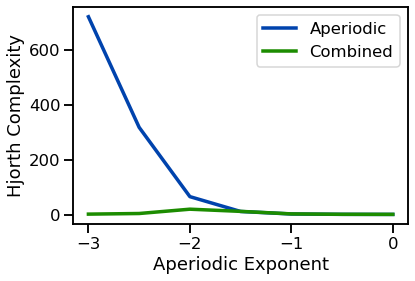

In [12]:
# Plot Hjorth complexity across exponents
plot_lines(EXPS, hjc_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, hjc_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Hjorth Complexity')
plot_lines(save_fig=SAVE_FIG, file_name='hjc_both', file_path='complexity')

### Hjorth Parameters: Periodic Variations

In [13]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hjm_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_mobility_wrapper, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

hjc_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_complexity_wrapper, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

In [14]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hjm_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_mobility_wrapper, {},
                        update='update_pow', values=FREQS, n_sims=N_SIMS)

hjc_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, hjorth_complexity_wrapper, {},
                        update='update_pow', values=FREQS, n_sims=N_SIMS)

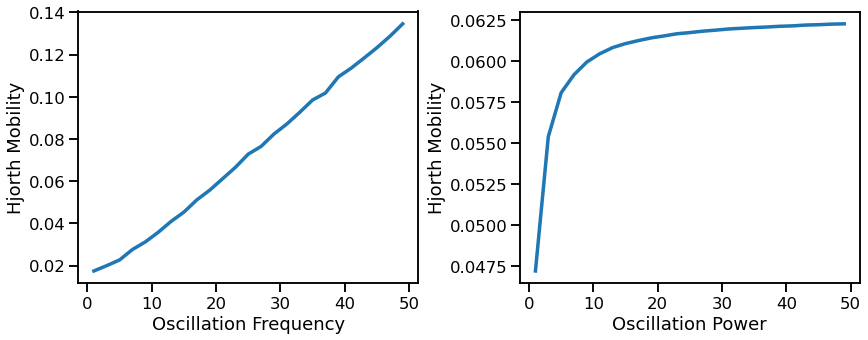

In [15]:
# Plot effect of oscillation variation on Hjorth mobility
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, hjm_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Hjorth Mobility', ax=axes[0])
plot_lines(FREQS, hjm_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Hjorth Mobility', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='hjm_osc_both', file_path='complexity')

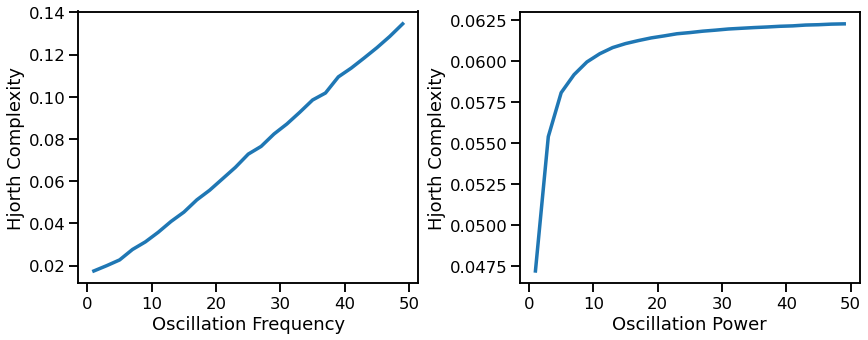

In [16]:
# Plot effect of oscillation variation on Hjorth complexity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, hjm_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Hjorth Complexity', ax=axes[0])
plot_lines(FREQS, hjm_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Hjorth Complexity', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='hjc_osc_both', file_path='complexity')

## Fractal Dimensions

Calculate measures of fractal dimension on time series. 

Current messsy code below copies implementations:
- Higuchi Fractal Dimension
- Petrosian Fractal Dimension
- Katz Fractal Dimension

### Calculating Fractal Dimension on Example Signals

In [17]:
# Check Higuchi fractal dimension measures on example signals
print('Higuchi fractal dimension:')
print('  powerlaw: \t {:1.4f} \t {:1.2f}'.format(higuchi_fd(SIG_AP), convert_exp_fd(-EXP)))
print('  osc:      \t {:1.4f}'.format(higuchi_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(higuchi_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(higuchi_fd(SIG_KN)))

Higuchi fractal dimension:
  powerlaw: 	 1.4505 	 1.50
  osc:      	 1.0069
  combined: 	 1.0394
  knee:     	 1.5917


In [18]:
# Check Katz fractal dimension measures on example signals
print('Katz fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(katz_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(katz_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(katz_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(katz_fd(SIG_KN)))

Katz fractal dimension:
  powerlaw: 	 1.9801
  osc:      	 3.2026
  combined: 	 2.2277
  knee:     	 4.0479


In [19]:
# Check Petrosian fractal dimension measures on example signals
print('Petrosian fractal dimension:')
print('  powerlaw: \t {:1.4f}'.format(petrosian_fd(SIG_AP)))
print('  osc:      \t {:1.4f}'.format(petrosian_fd(SIG_OSC)))
print('  combined: \t {:1.4f}'.format(petrosian_fd(SIG_COMB)))
print('  knee:     \t {:1.4f}'.format(petrosian_fd(SIG_KN)))

Petrosian fractal dimension:
  powerlaw: 	 1.0162
  osc:      	 1.0008
  combined: 	 1.0057
  knee:     	 1.0186


## Fracal Dimension: Aperiodic Variations

In [20]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, higuchi_fd, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

kfd_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, katz_fd, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

pfd_sims_exp = run_sims(sim_powerlaw, SIM_PARAMS_AP, petrosian_fd, {},
                        update='update_exp', values=EXPS, n_sims=N_SIMS)

In [21]:
# Run a set of simulations, calculating fractal dimension across exponents
hfd_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

kfd_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, katz_fd, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

pfd_sims_comb = run_sims(sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
                         update='update_comb_exp', values=EXPS, n_sims=N_SIMS)

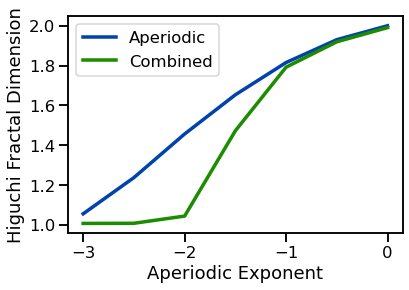

In [22]:
# Plot Higuchi fractal dimension measures
plot_lines(EXPS, hfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, hfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Higuchi Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='hfd_both', file_path='complexity')

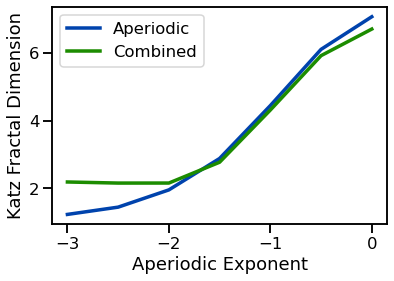

In [23]:
# Plot Katz fractal dimension measures
plot_lines(EXPS, kfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, kfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Katz Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='kfd_both', file_path='complexity')

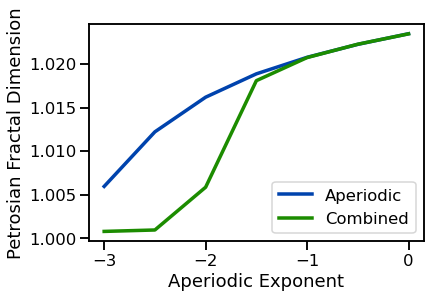

In [24]:
# Plot Petrosian fractal dimension measures
plot_lines(EXPS, pfd_sims_exp, color=AP_COL, label='Aperiodic')
plot_lines(EXPS, pfd_sims_comb, color=COMB_COL, label='Combined')
plot_lines(xlabel='Aperiodic Exponent', ylabel='Petrosian Fractal Dimension')
plot_lines(save_fig=SAVE_FIG, file_name='pfd_both', file_path='complexity')

## Fracal Dimension: Periodic Variations

In [25]:
# Run a set of simulations, calculating fractal dimension across oscillation frequency
hfd_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

kfd_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, katz_fd, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

pfd_sims_freq = run_sims(sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
                         update='update_freq', values=FREQS, n_sims=N_SIMS)

In [26]:
# Run a set of simulations, calculating fractal dimension across oscillation power
hfd_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, higuchi_fd, {},
                        update='update_pow', values=FREQS, n_sims=N_SIMS)

kfd_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, katz_fd, {},
                        update='update_pow', values=FREQS, n_sims=N_SIMS)

pfd_sims_pow = run_sims(sim_combined, SIM_PARAMS_COMB, petrosian_fd, {},
                        update='update_pow', values=FREQS, n_sims=N_SIMS)

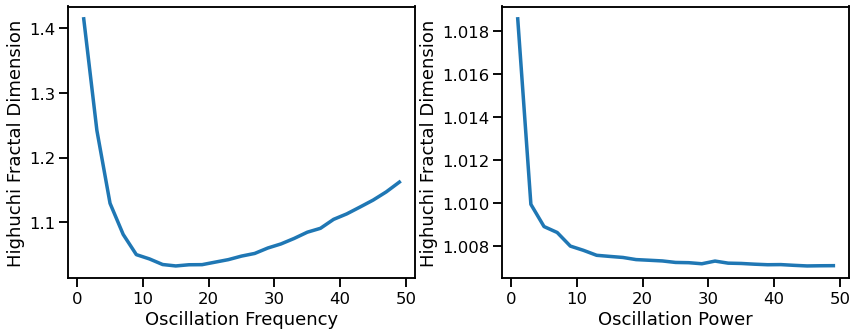

In [27]:
# Plot effect of oscillation variation on Higuchi fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, hfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Highuchi Fractal Dimension', ax=axes[0])
plot_lines(FREQS, hfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Highuchi Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='hfd_osc_both', file_path='complexity')

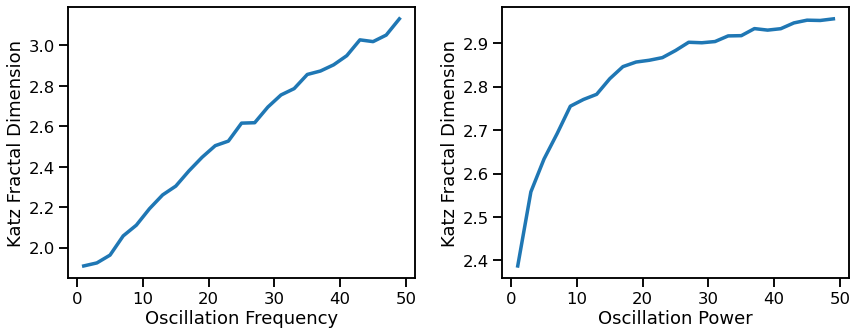

In [28]:
# Plot effect of oscillation variation on Katz fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, kfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Katz Fractal Dimension', ax=axes[0])
plot_lines(FREQS, kfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Katz Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.25)
plot_lines(save_fig=SAVE_FIG, file_name='kfd_osc_both', file_path='complexity')

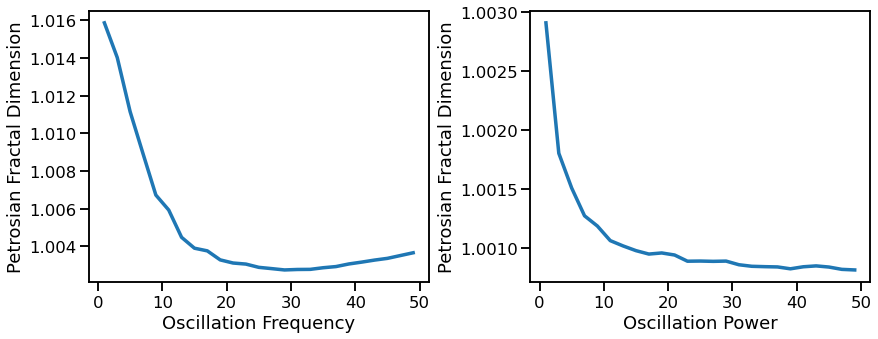

In [29]:
# Plot effect of oscillation variation on Petrosian fractal dimension
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_lines(FREQS, pfd_sims_freq, ax=axes[0])
plot_lines(xlabel='Oscillation Frequency', ylabel='Petrosian Fractal Dimension', ax=axes[0])
plot_lines(FREQS, pfd_sims_pow, ax=axes[1])
plot_lines(xlabel='Oscillation Power', ylabel='Petrosian Fractal Dimension', ax=axes[1])
plt.subplots_adjust(wspace=0.3)
plot_lines(save_fig=SAVE_FIG, file_name='pfd_osc_both', file_path='complexity')